# Linear Comparison
- Just generates basic sequential graph between naive and strassen

In [192]:
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [193]:
# # jupyter
# tk = th.Thicket.from_caliperreader(glob("/home/stevenm27/435Project/caliper/cpu_mpi/naive/*.cali", recursive=True))

# local
parallel = 'cpu_linear'

# GLOBAL VARS
process_cols = (1,)
df_linear = pd.DataFrame()
df_strassen = pd.DataFrame()

for algo in ('naive', 'strassen'):
    tk = th.Thicket.from_caliperreader(glob(f"../caliper/{parallel}/{algo}/*.cali", recursive=True))

    gb = tk.groupby("num_procs")

    ctk = th.Thicket.concat_thickets(
        thickets=list(gb.values()),
        headers=list(gb.keys()),
        axis="columns",
        metadata_key="InputSize"
    )
    
    print(ctk.dataframe)
    
    if algo == 'naive':
        df_linear = ctk.dataframe
    else:
        df_strassen = ctk.dataframe
    
df_linear

1  thickets created...
{1: <thicket.thicket.Thicket object at 0x00000256EA079490>}
                                                              1  \
                                                            nid   
node                                              InputSize       
{'name': 'main', 'type': 'function'}              128         1   
                                                  256         1   
                                                  512         1   
                                                  1024        1   
                                                  2048        1   
                                                  4096        1   
{'name': 'comp', 'type': 'function'}              128         3   
                                                  256         3   
                                                  512         3   
                                                  1024        3   
                                              

1  \
                                                            nid   
node                                              InputSize       
{'name': 'main', 'type': 'function'}              128         1   
                                                  256         1   
                                                  512         1   
                                                  1024        1   
                                                  2048        1   
                                                  4096        1   
{'name': 'comp', 'type': 'function'}              128         3   
                                                  256         3   
                                                  512         3   
                                                  1024        3   
                                                  2048        3   
                                                  4096        3   
{'name': 'comp_large', 'type': 'function'}        128         4   
                                                  256         4   
                                                  512         4   
                                                  1024        4   
                                                  2048        4   
                                                  4096        4   
{'name': 'correctness_check', 'type': 'function'} 128         5   
                                                  256         5   
                                                  512         5   
                                                  1024        5   
                                                  2048        5   
                                                  4096        5   
{'name': 'data_init', 'type': 'function'}         128         2   
                                                  256         2   
                                                  512         2   
                                                  1024        2   
                                                  2048        2   
                                                  4096        2   

                                                                            \
                                                              spot.channel   
node                                              InputSize                  
{'name': 'main', 'type': 'function'}              128        regionprofile   
                                                  256        regionprofile   
                                                  512        regionprofile   
                                                  1024       regionprofile   
                                                  2048       regionprofile   
                                                  4096       regionprofile   
{'name': 'comp', 'type': 'function'}              128        regionprofile   
                                                  256        regionprofile   
                                                  512        regionprofile   
                                                  1024       regionprofile   
                                                  2048       regionprofile   
                                                  4096       regionprofile   
{'name': 'comp_large', 'type': 'function'}        128        regionprofile   
                                                  256        regionprofile   
                                                  512        regionprofile   
                                                  1024       regionprofile   
                                                  2048       regionprofile   
                                                  4096       regionprofile   
{'name': 'correctness_check', 'type': 'function'} 128        regionprofile   
                                                  256        regionprofile   
                                                  512   

Compose these 3 groups column-wise to get a holistic view of the data

Perform pandas operations to get the table in a desirable format for plotting

In [194]:
# Drop unwanted columns
array = [("node","")]
for i in process_cols:
    # comment out the one you wnat to plot
    array.append((i,"nid"))
    array.append((i,"spot.channel"))
    array.append((i,"Min time/rank"))
    array.append((i,"Max time/rank"))
    # array.append((i,"Avg time/rank"))
    array.append((i,"Total time"))

df_linear = df_linear.reset_index().drop(array, axis=1)
df_linear = df_linear.rename({("name", ""): "name", ("InputSize", ""): "InputSize"}).set_index(["name", "InputSize"])

df_strassen = df_strassen.reset_index().drop(array, axis=1)
df_strassen = df_strassen.rename({("name", ""): "name", ("InputSize", ""): "InputSize"}).set_index(["name", "InputSize"])
df_strassen = df_strassen.drop([(1, 'Retiring'), (1, 'Backend bound'), (1, 'Frontend bound'), (1, 'Bad speculation')], axis=1)

# now grab actual values
df_linear = df_linear.loc['main']
df_strassen = df_strassen.loc['main']

df_linear

,1
,Avg time/rank
InputSize,
128,0.045358
256,0.357011
512,3.300747
1024,34.874304
2048,323.149891
4096,2619.881903


In [195]:
df_strassen

,1
,Avg time/rank
InputSize,
128,0.045242
256,0.343284
512,2.828918
1024,22.501610
2048,186.112122
4096,1595.665294


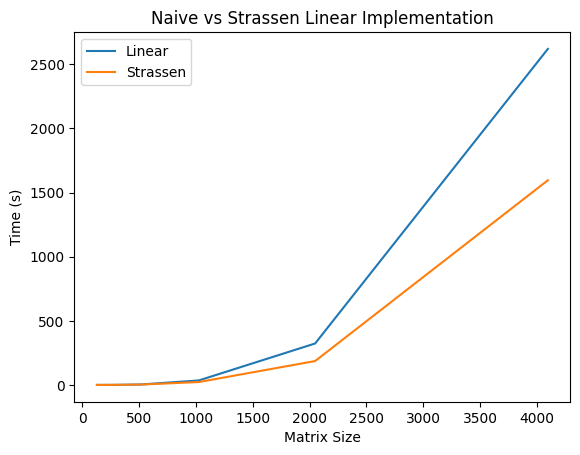

In [202]:
# Plot stuff!
fig, ax = plt.subplots()
ax.plot(df_linear, label='Linear')
ax.plot(df_strassen, label='Strassen')
ax.set_xlabel("Matrix Size")
ax.set_ylabel("Time (s)")
ax.set_title("Naive vs Strassen Linear Implementation")
ax.legend()



In [197]:
# import matplotlib.pyplot as plt

# # Assuming your DataFrame is named 'df'
# df = ctk.dataframe

# # Define the matrix sizes you want to plot
# matrix_sizes = [128, 256, 512, 1024, 2048, 4096]

# # Define the communication and computation data series
# comm = ["barrier", "bcast", "gather", "scatter"]
# comp = ["comp_large", "data_init", "correctness"]

# # Loop through matrix sizes and communication data series
# for j, data_series in enumerate(comm):
#     for i, matrix_size in enumerate(matrix_sizes):
#         plt.figure(figsize=(10, 5))  # Create a new figure for each plot
#         ax = plt.gca()
#         data = df.loc[(data_series, matrix_size), :]
#         data.index = data.index.droplevel(1)  # Remove the first level of the MultiIndex
#         data.plot(ax=ax, title=f'Matrix Size: {matrix_size}, Comm: {data_series}')
#         ax.set_xlabel("num_procs")
#         ax.set_ylabel("Time (seconds)")
#         plt.show()

# # Loop through matrix sizes and computation data series
# for j, data_series in enumerate(comp):
#     for i, matrix_size in enumerate(matrix_sizes):
#         plt.figure(figsize=(10, 5))  # Create a new figure for each plot
#         ax = plt.gca()
#         data = df.loc[(data_series, matrix_size), :]
#         data.index = data.index.droplevel(1)  # Remove the first level of the MultiIndex
#         data.plot(ax=ax, title=f'Matrix Size: {matrix_size}, Comp: {data_series}')
#         ax.set_xlabel("num_procs")
#         ax.set_ylabel("Time (seconds)")
#         plt.show()

In [198]:
# Define common variables
function_names = set(ctk.dataframe.index.get_level_values("name"))
threads = sorted(list(set(ctk.dataframe.index.get_level_values("num_procs"))))
matrix_sizes = sorted(ctk.dataframe.columns.tolist())

KeyError: 'Level name not found'

# Plotting

### Option 1
Use `pandas.DataFrame.plot` to automatically interface with matplotlib

In [ ]:
def plot_pandas(df, title, xlabel, ylabel, loglog):
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        grid=True,
        loglog=loglog
    )
    return plot

### Option 2
Use `matplotlib.pyplot` directly for more fine-grained control. Specifically for our case we can change the x axis scaling from base 10 to base 2.

In [ ]:
def plot_mpl(df, title, xlabel, ylabel):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.plot(
        df,
        marker='o',
    )
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend(matrix_sizes)
    plt.grid(True)
    plt.yscale("log", base=10)
    plt.xscale("log", base=2)
    plt.xticks(threads)
    plt.show()
    return fig, ax

# Examples

## time

In [ ]:
ctk.dataframe.loc["main"]

4                                           \
          Min time/rank Max time/rank Avg time/rank   Total time   
InputSize                                                          
128            0.392027      0.398540      0.393913     1.575651   
256            0.346411      0.400129      0.360285     1.441141   
512            0.500207      0.958925      0.615386     2.461545   
1024           1.937511      7.917518      3.432799    13.731198   
2048          16.257582     80.443053     32.304383   129.217530   
4096         328.697990   1675.564007    665.414500  2661.657998   

                                         8                              \
          Variance time/rank Min time/rank Max time/rank Avg time/rank   
InputSize                                                                
128                 0.000007      0.433096      0.440360      0.434221   
256                 0.000529      0.492410      0.554987      0.503490   
512                 0.039340      0.529886      1.233589      0.620466   
1024                6.704234      1.325889      7.550431      2.105368   
2048              772.443856      8.460777     69.807645     16.129681   
4096           340134.008948    179.716693   1563.045031    352.633664   

                                                     16                \
            Total time Variance time/rank Min time/rank Max time/rank   
InputSize                                                               
128           3.473769           0.000005      6.131866      9.241619   
256           4.027923           0.000395      0.508943      0.568770   
512           4.963731           0.053707      0.520784      1.136749   
1024         16.842943           4.235534      0.951594      6.832092   
2048        129.037449         411.617690      4.591423     65.259147   
4096       2821.069309      209299.382431     94.743396   1454.893124   

                                                                   32  \
          Avg time/rank   Total time Variance time/rank Min time/rank   
InputSize                                                               
128            7.685408   122.966527           2.398687      6.152744   
256            0.518767     8.300279           0.000184      0.574143   
512            0.564259     9.028137           0.021859      0.522779   
1024           1.323841    21.181450           2.022738      0.701745   
2048           8.386800   134.188794         215.630935      2.819830   
4096         179.756225  2876.099606      108398.274082     45.091347   

                                                                       \
          Max time/rank Avg time/rank   Total time Variance time/rank   
InputSize                                                               
128            9.262938      6.933099   221.859167           1.797111   
256            0.643461      0.589362    18.859579           0.000127   
512            1.005280      0.548887    17.564379           0.006770   
1024           7.764880      0.928738    29.719625           1.507534   
2048          66.892633      5.492441   175.758118         121.681125   
4096        1445.773181     88.866504  2843.728124       59393.410687   

                     64                                           \
          Min time/rank Max time/rank Avg time/rank   Total time   
InputSize                                                          
128            6.139745      9.087473      6.514431   416.923586   
256            3.180303      3.679889      3.591665   229.866588   
512            0.460709      1.103177      0.518809    33.203748   
1024          19.128636     29.219222     22.336157  1429.514063   
2048           2.269738     62.094665      3.961659   253.546177   
4096          23.617032   1422.557660     45.483347  2910.934204   

                                       128                              \
          Variance time/rank Min time/rank Max time/rank Avg time/rank   
InputSi

In [ ]:
for name in function_names:
    plot_pandas(
        df=ctk.dataframe.loc[name],
        title=name,
        xlabel="Threads",
        ylabel="Time (seconds)",
        loglog=True
    )

NameError: name 'function_names' is not defined

In [ ]:
for name in function_names:
    plot_mpl(
        df=ctk.dataframe.loc[name],
        title=name,
        xlabel="num_procs",
        ylabel="Time (seconds)",
    )

## Speedup

In [ ]:
speedup_df = ctk.dataframe.loc[(slice(None),1), :].reset_index().drop("threads", axis=1).set_index("name")/ctk.dataframe

for name in function_names:
    plot_pandas(
        df=speedup_df.loc[name],
        title=f"{name}: thread-1/thread-N",
        xlabel="Threads",
        ylabel="Speedup",
        loglog=False
    )